#**Step 1: Set Up Your Environment**
###install required libraries

In [1]:
!pip install pandas numpy matplotlib seaborn

# **Step 2: Load the Dataset**
## Download the student-mat.csv file and place it in the working directory.
## Load it using pandas.

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/student-mat.csv")

In [5]:
# Display first few rows
df.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


#**Step 3: Data Exploration**
##3.1 Check for Missing Values

In [6]:
# Check for missing values
df.isnull().sum()

,0
school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3,0


##**3.2 Display Data Types**

In [7]:
# Display data types
df.dtypes

,0
school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3,object


##**3.3 Understand Dataset Size**

In [8]:
# Shape of the dataset
df.shape  # (rows, columns)

(395, 1)

#**Step 4: Data Cleaning**
##**4.1 Handle Missing Values**

#1: Fill with the median value.
#2: Drop rows with missing values.

In [10]:
df.dropna(inplace=True)  # Remove rows with missing values

##**4.2 Remove Duplicate Entries**

In [11]:
df.drop_duplicates(inplace=True)

#**Step 5: Answer Analysis Questions**
##5.1 Calculate Average Final Grade (G3)

In [21]:
avg_G3 = df["G3"].mean()
print(f"Average Final Grade (G3): {avg_G3}")


Average Final Grade (G3): 10.415189873417722


##5.2 Count Students Who Scored Above 15 in G3

In [22]:
high_scorers = df[df["G3"] > 15].shape[0]
print(f"Number of students scoring above 15 in G3: {high_scorers}")

Number of students scoring above 15 in G3: 40


##5.3 Correlation Between Study Time and Final Grade

In [23]:
import numpy as np

correlation = np.corrcoef(df["studytime"], df["G3"])[0,1]
print(f"Correlation between study time and G3: {correlation}")


Correlation between study time and G3: 0.09781968965319626


##**Interpretation:**

###A positive value means more study time increases grades.
###A negative value means more study time decreases grades.
###A near-zero value means no correlation.

##5.4 Gender-wise Comparison of Average Final Grade

In [24]:
avg_G3_gender = df.groupby("sex")["G3"].mean()
print(avg_G3_gender)

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


#**Step 6: Data Visualization**
###6.1 Histogram of Final Grades (G3)

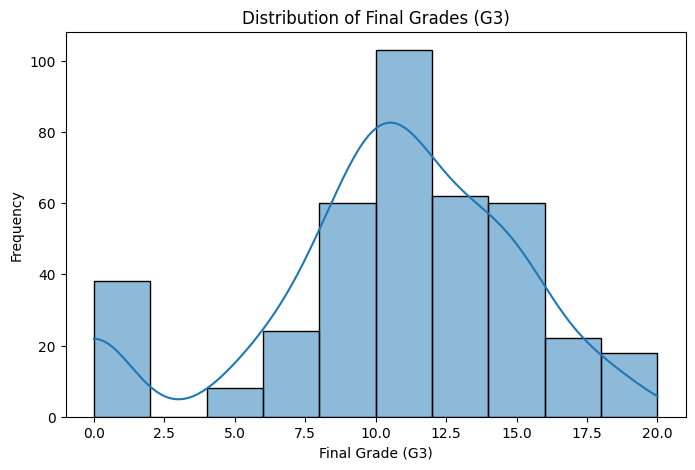

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["G3"], bins=10, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.show()

###6.2 Scatter Plot: Study Time vs. Final Grade

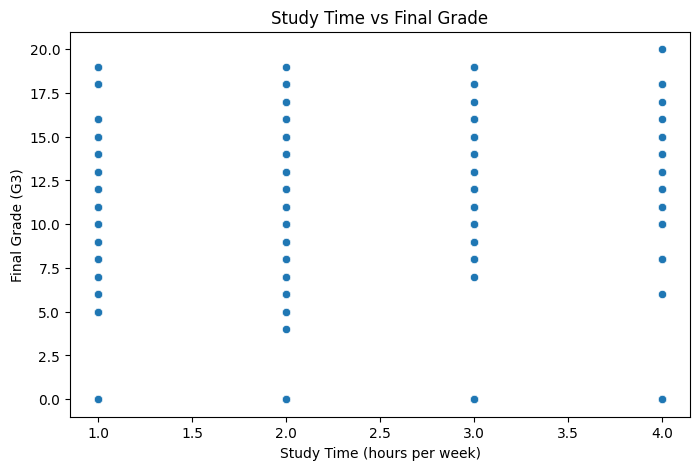

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["studytime"], y=df["G3"])
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time (hours per week)")
plt.ylabel("Final Grade (G3)")
plt.show()

###6.3 Bar Chart: Average G3 by Gender



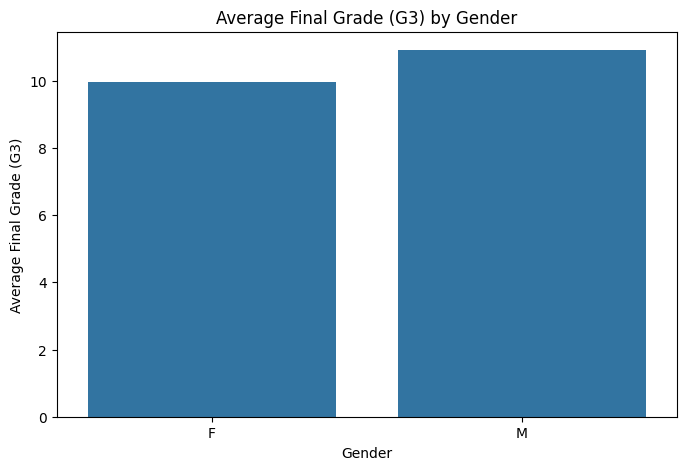

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_G3_gender.index, y=avg_G3_gender.values)
plt.title("Average Final Grade (G3) by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.show()